**REMEMBER:** Google/Wikipedia are your friends!! Search for any term you are not familiar with!
Try to get a rough idea of what each term is about. Be brave!


# An excuse to "play" with units and numerics

We have seen in class that the Goldman equation can be derived more rigourously from two basic hypotheses. It outperforms the ohmic approximation, that here is considered the Taylor's series first-order expansion around the reversal potential for each ionic species.


## Let's now write some Python!

We define two functions to numerically calculate the current density, according to the Goldman equation, for different ionic species. We plot and compare the results with the Ohmic approximation.

In [35]:
# Let's now use matplotlib as a graphical library and numpy as numerical library
import matplotlib.pyplot as plt
import numpy as np

R = 8.3         # J / K
T = 37 + 273.15 # K
F = 96485.33    # C
q = 1.602E-19   # C
d = 6E-9        # m  -- thickness of the membrane

def goldman(V, z, u, cin, cout):
  a = z * F / (R * T)                   # 1/V
  P = u /(abs(z) * q) * R * T / d       # m/s

#  return P * a * V * (cout - cin * np.exp(a * V)) / (1- np.exp(a * V))
# this is the molar flux, measured as mole per unit of time and unit of surface
# If I want to have an electrical current (density, i.e. C/(s m^2)) I must multiply by z * 96485.33 C/mole.
  return z * V * (cout - cin * np.exp(a * V)) / (1- np.exp(a * V))


def ohm(V, z, u, cin, cout):        # Taylor's series expansion, to the first order
  a = z * F / (R * T)                   # 1/V
  P = u /(abs(z) * q) * R * T / d       # m/s
  E = R * T / (z * F) * np.log(cout/cin)

#  return -P * a * cin * cout / (cin - cout) * np.log(cout/cin) * (V - E)
# this is the molar flux, measured as mole per unit of time and unit of surface
# If I want to have an electrical current (density, i.e. C/(s m^2)) I must multiply by z * 96485.33 C/mole.
  return -z * cin * cout / (cin - cout) * np.log(cout/cin) * (V - E)


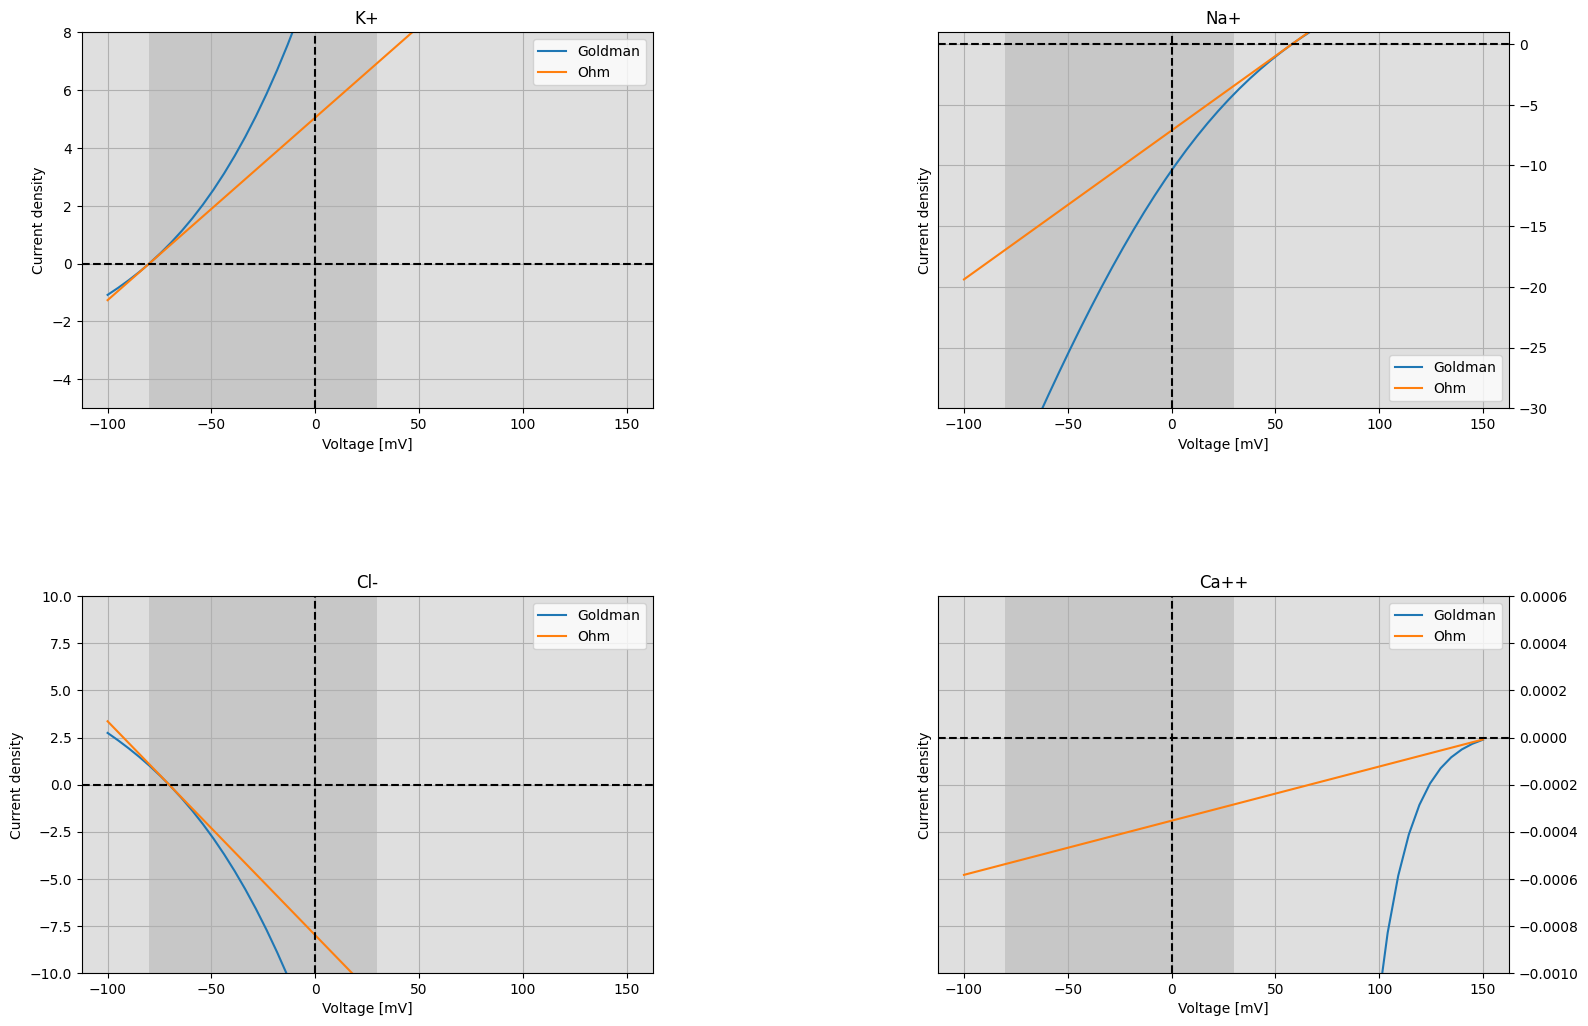

In [41]:
# https://www.priyamstudycentre.com/2021/07/ionic-mobility.html
## Mobility [m^2 / (s Volt)]
# K+  ---> 7.61E-8
# Na+ -->  5.20E-8
# Cl- ---> 7.90E-8
# Ca2+ --> 6.16E-8
# Mg2+ --> 5.50E-8

## Concentrations [milliMole/litre]
# K+    out: 20     in: 400
# Na+   out: 440    in: 50
# Cl-   out: 560    in: 40
# Ca++  out: 10     in: 1E-4

# Create a figure
#fig = plt.figure(figsize=(80,80))
fig, axs = plt.subplots(2, 2)
# Change the size of the whole figure
fig.set_size_inches(15, 10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)

V = np.linspace(-0.100, 0.150, 50)    # Volt

# Note: J * z * F is in A/m^2
# I want to express it in mA/cm^2

# A/m^2 = 10^3 mA / 10^4 cm^2 = 0.1 mA/cm^2

# For Potassium ions (K+) ------------------------------------------------------
z    = +1
cout = 20    # mMmole/litre
cin  = 400   # mMmole/litre
u    = 7.61E-8  # m^2/(s Volt) -- mobility
Jk = goldman(V, z, u, cin, cout) # a.u.

jjk = ohm(V, z, u, cin, cout) # a.u.

axs[0, 0].plot(V * 1000., Jk, V * 1000, jjk)
axs[0, 0].set_title('K+')


# For Sodium ions (Na+) --------------------------------------------------------
z    = +1
cout = 440      # mMmole/litre
cin  = 50       # mMmole/litre
u    = 5.2E-8   # m^2/(s Volt) -- mobility
Jna = goldman(V, z, u, cin, cout)  # a.u.

jjna = ohm(V, z, u, cin, cout)  # a.u.

axs[0, 1].plot(V * 1000., Jna, V* 1000., jjna)
axs[0, 1].set_title('Na+')


# For Chloride ions (Na+) --------------------------------------------------------
z    = -1
cout = 560      # mMmole/litre
cin  = 40       # mMmole/litre
u    = 7.9E-8   # m^2/(s Volt) -- mobility
Jcl  = goldman(V, z, u, cin, cout)  # a.u.

jjcl = ohm(V, z, u, cin, cout)  # a.u.

axs[1, 0].plot(V * 1000., Jcl, V * 1000., jjcl)
axs[1, 0].set_title('Cl-')


# For Calcium ions (Ca++) --------------------------------------------------------
z    = +2
cout = 10           # mMmole/litre
cin  = 0.0001       # mMmole/litre
u    = 7.9E-8       # m^2/(s Volt) -- mobility
Jca = goldman(V, z, u, cin, cout) # a.u.

jjca = ohm(V, z, u, cin, cout) # a.u.

axs[1, 1].plot(V * 1000., Jca, V * 1000., jjca)
axs[1, 1].set_title('Ca++')

axs[0, 1].yaxis.tick_right()
axs[1, 1].yaxis.tick_right()

axs[0, 0].set_ylim(-5, 8)
axs[0, 1].set_ylim(-30, 1)
axs[1, 0].set_ylim(-10, 10)
axs[1, 1].set_ylim(-0.001,0.0006)


for ax in axs.flat:
    ax.set(xlabel='Voltage [mV]', ylabel='Current density')
    ax.grid()
    ax.legend(['Goldman', 'Ohm'])
    #ax.set_ylim(-1e6, 5*1e6)
    # Let's plot a cross at the center
    ax.axvline(x=0, color='k', linestyle='--')
    ax.axhline(y=0, color='k', linestyle='--')
    # Let's make a shaded region in the range [-0.08 ; +0.03]
    ax.axhspan(-80, 30, facecolor='0.5', alpha=0.25)
    ax.axvspan(-80, 30, facecolor='0.5', alpha=0.25)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()

